### Problem 1
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 


In [84]:
### your solution
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

# setup
np.random.seed(100)
coefficients = []
ols = linear_model.LinearRegression()

for i in range(100):
    x = np.random.rand(30,2) # 30 random numbers in 2 columns
    y = 3*x[:,0] + 5*x[:,1] + np.random.rand(30) # formula 3X + 5X + u
    ols.fit(x,y)
    coefficients.append(ols.coef_)

# compute mean and variance on coeffecients

beta0_coef_results = pd.Series(np.array(coefficients)[:,0])
beta1_coef_results = pd.Series(np.array(coefficients)[:,1])

print("beta0 mean: %.5f" % beta0_coef_results.mean())
print("beta0 variance: %.5f" % beta0_coef_results.var())
print("beta1 mean: %.5f" % beta1_coef_results.mean())
print("beta1 variance: %.5f" % beta1_coef_results.var())

beta0 mean: 3.01364
beta0 variance: 0.03500
beta1 mean: 5.01981
beta1 variance: 0.03289


### Problem 2
This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of mpg? How to explain it?
    - (b) What is the coefficient of determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.

A: ####################################
Coef of mpg is: -0.1578447334 -- it is derived from the formula of coefficients. It is an optimization formula to minimize RSS. 
B: ####################################
Coef determination of our model is: 0.6059482579 -- it is based the calculation of R squared https://en.wikipedia.org/wiki/Coefficient_of_determination
C: ####################################
The fomular is Y = -0.15784X + 39.93586
D: ####################################
The horsepower of 98 based on our model predicts mpg at: 24.47 
E: ####################################


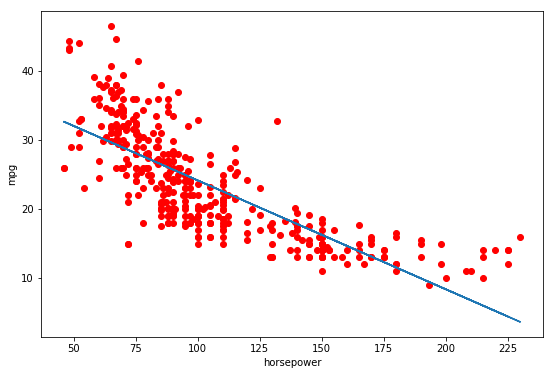

In [85]:
### your solution
auto_file = pd.read_csv("Auto.csv")
x = auto_file[["horsepower"]]
y = auto_file[["mpg"]]

ols.fit(x,y)

def print_hash(letter):
    print("%s: ####################################"% letter)

print_hash("A")
print("Coef of mpg is: %.10f -- it is derived from the formula \
of coefficients. It is an optimization formula to minimize \
RSS. " % ols.coef_)

print_hash("B")
print("Coef determination of our model is: %.10f -- it is based \
the calculation of R squared https://en.wikipedia.org/wiki/Coefficient_of_determination" % ols.score(x,y))

print_hash("C")
print("The fomular is Y = %.5fX + %.5f" % (ols.coef_, ols.intercept_) )

print_hash("D")
print("The horsepower of 98 based on our model predicts mpg at: %.2f " % ols.predict(98))

print_hash("E")
# plt.figure(figsize=(x.max().values[0],y.max().values[0]))
plt.figure(figsize=(9, 6))
plt.scatter(x,y, color="red")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.plot(x, ols.coef_*x + ols.intercept_)
plt.show()


### Problem 3
Without using the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the coefficient of determination and prediction. Note that the results should be exactly the same with the results in question (2).

In [105]:
### your solution
Xnp = np.array(x.horsepower.values)  
Ynp = np.array(y.mpg.values)

A = np.vstack([Xnp, np.ones(len(Xnp))]).T
m, c = np.linalg.lstsq(A, y)[0]

print("Coef: %.10f, Intercept %.10f" % (m,c))

Coef: -0.1578447334, Intercept 39.9358610212
